# ---------------------------------------------------------------
# Task 1 – Data Cleansing and Initial Analyses
# ---------------------------------------------------------------

Data cleaning is an important step that you need to take before applying any prediction/analytical model. But you need to know what to clean and where to look for in order to apply this method.


## First look to our data
After importing some essential libraries, we are going to extract some information about our data. Each row gives details for all of the 7,034 individual customers, e.g. the length of their tenure, internet service type, contract type, monthly charges. The target for prediction is the ‘Churn’ column, indicating whether or not the customer cancelled their service.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('customers.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Pandas didn’t detect all of the values in the ‘TotalCharges’ column to be float64 type, so we probably have some non-numeric data in the column.

In [2]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Looks like the blank ‘TotalCharges’ values were for customers with 0 months tenure. We will adjust these values to $0.

In [3]:
%%capture
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

Next we’ll convert the categorical values into numeric values, so our ML algorithms can process the data. We will also remove the columns not used in the predictive model.

In [4]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


## Correlations between customer data features and customer churn
Correlation of explanatory variables is known as multicollinearity, and perfect multicollinearity occurs when the correlation between two independent variables is equal to 1 or -1.

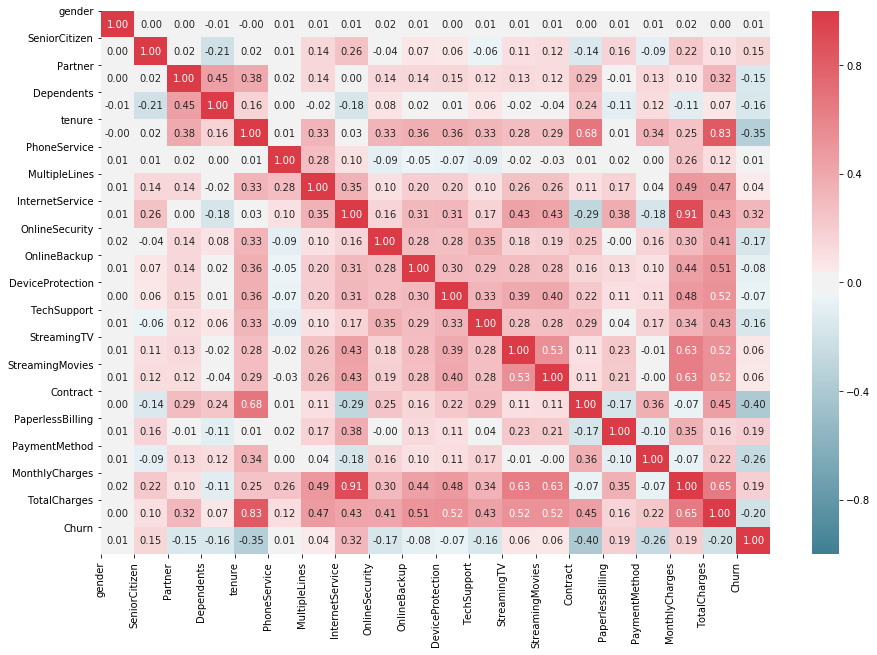

In [5]:
# Create Correlation
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Let's clean the unnecessary data by removing one side of the diagonal

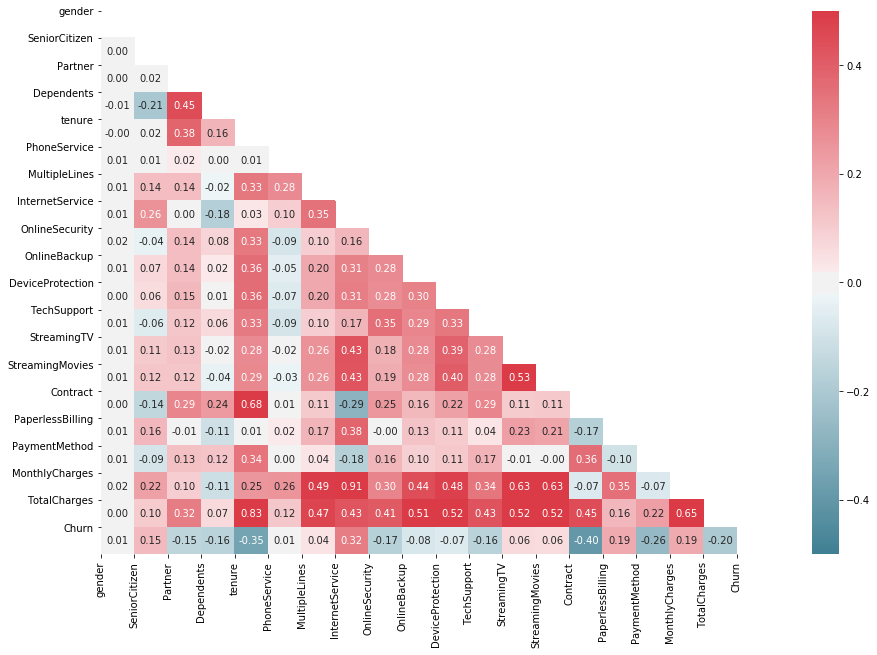

In [6]:
# Drop self-correlations
fig, ax = plt.subplots(figsize=(15, 10))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf,vmin=-0.5, vmax=0.5)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Improving Customer Acquisition

##### We can see that Churn is somehow directly proportional to 'InternetService' and 'Monthly Charges', showing that clients with higher chances to churn tend to spend more money in these utulities. One way to avoid this situation is to downgrade the client's package, maybe with a special price for them in a temporary basis, so we can avoid their churn by showing that we care that they keep their service, giving to them affordable options.

##### As inversely proportional to Churn we can see Tenure and Contract as the top ones, showing that clients that are loyal to the company tend to be keep their loyalty. Here we see a great opportunity to implement a reward loyalty campaign for our oldest clients, showing them how much we appreciate their time with us (maybe 50% off in a partner product).

# Avoiding multicollinearity
Total charges and monthly charges are highly correlated. We try to avoid strongly correlated explanatory variables in regression models. To avoid unstable estimates of coeffiecients in our models, we will drop the ‘TotalCharges’ variable, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.

In [7]:
%%capture
data.pop('TotalCharges')

Looking at the distribution for customer’s tenure values, it behaves in a stable manner for most of our clients, menaning that customers tend to keep their products for quite a long time. The thing that we want to work on is to keep this high number of new customers (with low tenure) as our clients and avoid churn from the beggining.

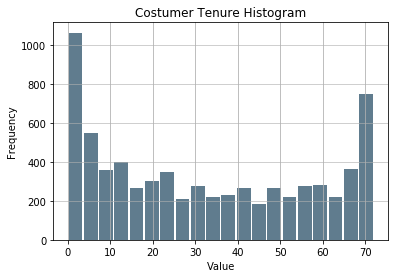

In [8]:
tenure = data['tenure']
tenure.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')

plt.title('Costumer Tenure Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# --------------------------- 
# Task 2 – Prediction
# ---------------------------

## Avoiding Overffiting and Underfitting

We will consider different models to predict customer churn. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 25% of the total records. More data will not generally help when your model are underfitting. It will, in fact, likely increase the training error. Therefore we should increase more features. Because that expands the hypothesis space. This includes making new features from existing features.

In [9]:
%%capture
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.25)

train_y = train['Churn']
test_y = test['Churn']

train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

## Logistic regression

Logistic regression is one of the more basic classification algorithms in a data scientist’s toolkit. It is used to predict a category or group based on an observation. Logistic regression is usually used for binary classification (1 or 0, win or lose, true or false). The output of logistic regression is a probability, which will always be a value between 0 and 1. While the output value does not give a classification directly, we can choose a cutoff value so that inputs with with probability greater than the cutoff belong to one class, and those with less than the cutoff belong to the other.

Intercept: [-0.91162954]
Regression: [[-0.00380664  0.24144332  0.02001163 -0.19396584 -0.03335275 -0.61368887
   0.27043375  0.60323577 -0.40738466 -0.19171146 -0.04430474 -0.41358126
   0.0825688   0.18697827 -0.66524476  0.35092625 -0.16169662  0.01155912]]
Accuracy of logistic regression classifier on test set: 0.81
             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1295
          1       0.66      0.55      0.60       466

avg / total       0.80      0.81      0.80      1761



Text(0.5,15,'Predicted label')

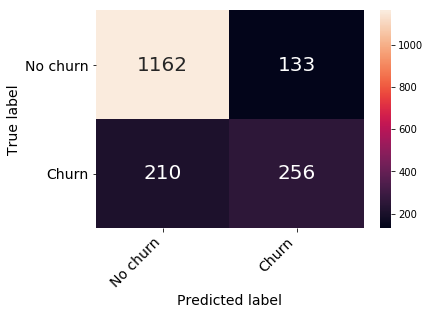

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
test_y_pred = logisticRegr.predict(test_x)

print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
confusion_matrix = confusion_matrix(test_y, test_y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
# plt.show()

We got 81% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

## Handling imbalanced classes
It is also important to look at the distribution of how many customers churn. If 95% of customers don’t churn, we can achieve 95% accuracy by building a model that simply predicts that all customers won’t churn. But this isn’t a very useful model, because it will never tell us when a customer will churn, which is what we are really interested in.

In [11]:
print(data['Churn'].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


The class for churn is only around 25% of the total population of samples. There is a real risk that a model trained on this data may only make too many predictions in favour of the majority class. To balance the data set, we can randomly duplicate observations from the minority class. This is also known as re sampling with replacement.

In [12]:
from sklearn.utils import resample

data_majority = data[data['Churn']==0]
data_minority = data[data['Churn']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5174, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

print(data_upsampled['Churn'].value_counts())

1    5174
0    5174
Name: Churn, dtype: int64


Now that we have a 1:1 ratio for our classes, let’s train another logistic regression model.

In [13]:
# 1:1 ratio for our classes, let’s train another logistic regression model
train, test = train_test_split(data_upsampled, test_size = 0.25)

train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']

train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')

logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)

test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.77
             precision    recall  f1-score   support

          0       0.80      0.73      0.76      1294
          1       0.75      0.81      0.78      1293

avg / total       0.77      0.77      0.77      2587



The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved.

## ROC Curve
Area Under ROC Curve (AUROC) represents the likelihood of a model distinguishing observations between two classes. In very simple terms, AUROC gives a single measure of how a model’s true positive rate and false positive rate change with different threshold values. The closer a model’s AUROC score is to 1, the better it is. To calculate AUROC, we need the predicted class probabilities:

In [14]:
# Area Under ROC Curve
from sklearn.metrics import roc_auc_score

# Get class probabilities for both models
test_y_prob = logisticRegr.predict_proba(test_x)
test_y_prob_balanced = logisticRegr_balanced.predict_proba(test_x_upsampled)

# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]

print('Unbalanced model AUROC: ' + str(roc_auc_score(test_y, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.841645815036373
Balanced model AUROC: 0.849538174285267


Interestingly, the AUROC scores are very similar between the two models. Both are above 0.5 however, suggesting that both models have the ability to distiguish between observations from each class.

# Decision Trees
Using tree-based algorithms such as decision trees or random forests can result in good models for unbalanced datasets. If the minority class exists in one area of the feature space, a tree will be able to separate the class into a single node. For example, if 99% of customers who stream movies tend to churn, then a tree-based algorithm will likely pick this up.

In [20]:
# Decision Trees
from sklearn import tree
import graphviz

# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)

# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)

# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None,
                         feature_names = list(train_x.columns.values),
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(churnTree)
# graph.render('decision_tree.gv', view=True)

# Trimming the tree
We have set the maximum depth of the tree to 4 in the above example. The other variable controlling the size of the tree is ‘min_samples_leaf’, which specifies the minimum number of samples required to split an internal node. The default depth and minimum samples per leaf are set to unlimited, which leads to fully grown and unpruned trees.

In [16]:
test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))

Accuracy of decision tree classifier on test set: 0.79


# Random forests
Random forests are an ensemble learning method, where the results from multiple decision trees are combined to make a final prediction. For example, a random forest may be made up of 10 decision trees, 7 of which make a prediction for ‘churn’ and 3 of which make a prediction for ‘no churn’. The final prediction for the forest will be ‘churn’.

In [17]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

Accuracy of random forest classifier on test set: 0.77


# Conclusion
Looks like we get similar performance to our pruned decision tree with a random forest. The next step would be to run several more rounds of cross validation using different training and testing sets to measure the performance of each of the models. We would then average the results from all rounds of cross validation to estimate the accuracy of each machine learning model.

# Implementation


Nothing will matter if you have the top 1 machine learning model but you do not know to implement it in the real world. The key for doing that nowadays is applying DevOps, a method that brings the Developer and Operational together, so they can implement the new code as quickly as possible with no major issues. So basicaly we code small pieces of the whole project, we test it and implement it, instead of waiting to build the entire project. This idea came with the 'lean production' mindset, where we need to build a MVP (Minimum viable product) as soon as we can, so we can test it and receive a feddback from it.